In [1]:
#first install liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('Marketing_Data.csv')
df.sample(6)

,youtube,facebook,newspaper,sales
48,144.60,34.20,17.04,17.04
44,155.28,6.84,37.56,13.20
114,125.52,6.84,41.28,12.48
70,162.24,50.04,55.08,20.64
40,260.16,52.68,32.64,26.76
131,207.00,21.72,36.84,17.28


In [3]:
#check how many row and columns
df.shape

(171, 4)

In [4]:
#to check null value
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

<AxesSubplot: >

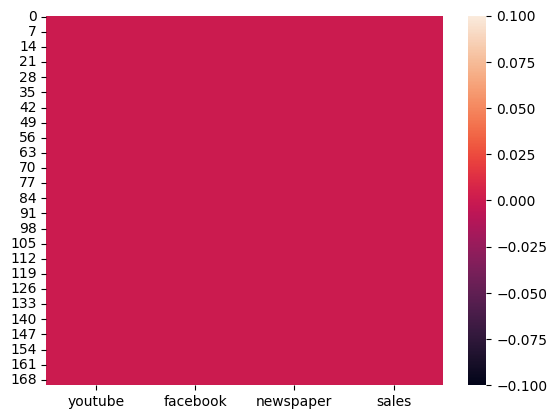

In [5]:
#visulize columns
sns.heatmap(df.isnull())

In [6]:
#check datatypes
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot: >

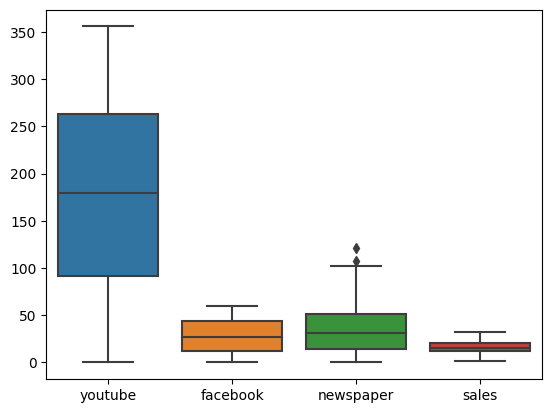

In [7]:
#check outlier
sns.boxplot(data=df)

In [8]:
#to retrive newspaper record
a=df[(df["newspaper"]>100)].index
print(a)

Int64Index([46, 72, 136], dtype='int64')


In [9]:
df.drop(a,inplace=True)

<AxesSubplot: >

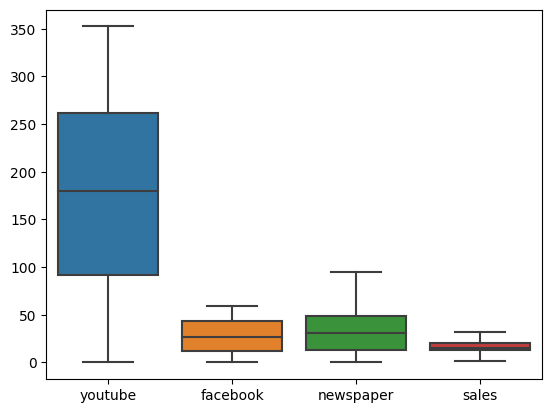

In [10]:
sns.boxplot(data=df)

In [11]:
#select input columns name
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

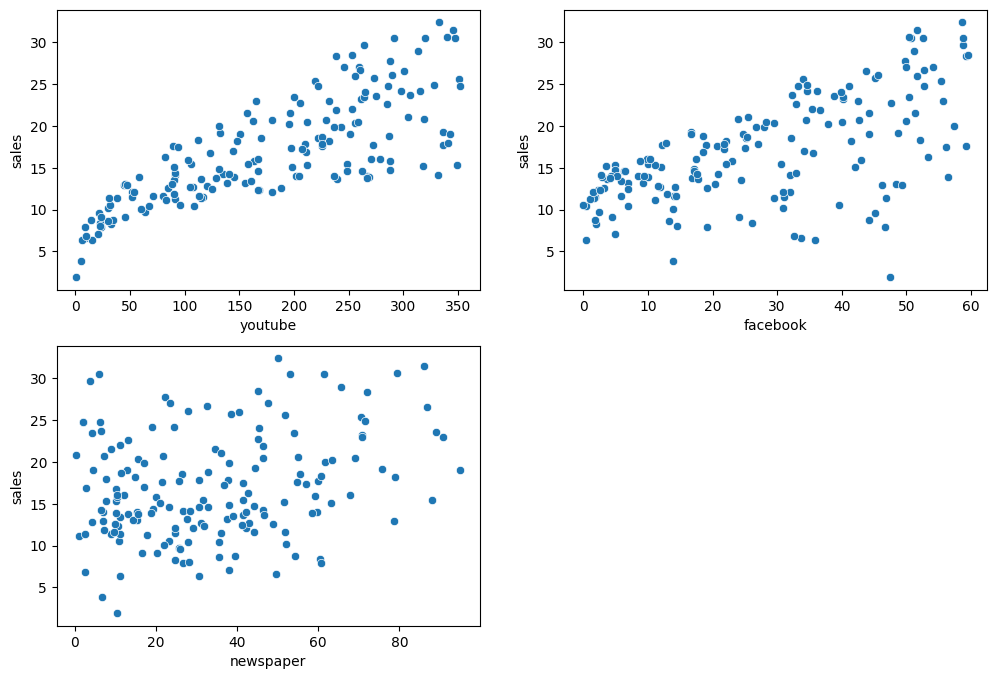

In [12]:
columns=['youtube', 'facebook', 'newspaper'] #list of input column name
plt.figure(figsize=(12,8))
for i,col in enumerate(columns):
  plt.subplot(2,2,i+1)
  sns.scatterplot(data=df,x=col,y="sales")

In [13]:
#see this graph, positive correlation between youtube and sales and facebook with sales 
#and no any correlation between nwespaper with sales

<AxesSubplot: >

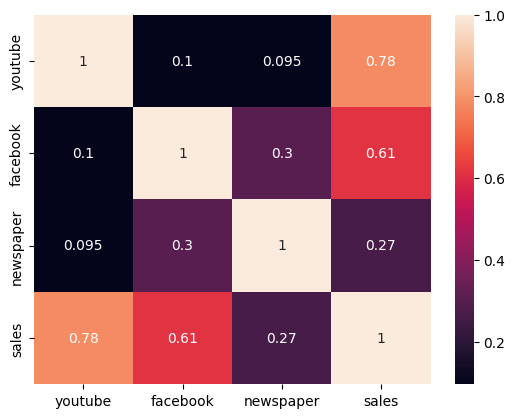

In [14]:
#check correlaton between each input with output
sns.heatmap(df.corr(),annot=True)

In [15]:
#correlation values with youtube and sales=0.78 , It is very good
#correlation values with facebook and sales=0.6 , It is good(ok)
#correlation values with newspaper and sales=0.25 , It is very bad

In [16]:
#Performing the modeling 
#Modeling with input : youtube and output sales 
#SLR(simple linear regression) : only one input
#Select input and output from dataset
x=df[['youtube']] #input always 2D array
y=df['sales'] #output always 1D array

In [17]:
x.shape

(168, 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
x_train.sample(4)

,youtube
99,264.36
110,221.88
114,125.52
41,238.92


In [20]:
x_test.shape

(51, 1)

In [21]:
x_test.sample(4)

,youtube
168,212.40
12,212.40
121,336.84
138,248.16


In [22]:
#Train the model with 70% training data
#train with Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
#create the object LinearRegression() model
lr=LinearRegression()

In [24]:
#train the model
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
#slop/cofficeant
lr.coef_

array([0.0457148])

In [26]:
# To check intercept
lr.intercept_

8.51695211421962

In [27]:
#test the model 30% data
y_pred=lr.predict(x_test)

In [28]:
#create a dictionary
dff={"Actual output ":y_test,"Predicted output":y_pred}
#convert into dataframe
df1=pd.DataFrame(dff)
#to add input x_test
df1["x_test"]=x_test
df1.sample(15)

,Actual output,Predicted output,x_test
87,14.64,16.153153,167.04
121,19.32,23.915527,336.84
5,11.40,13.766840,114.84
52,14.76,21.671844,287.76
77,8.64,9.888396,30.00
122,13.92,15.154742,145.20
95,23.64,21.106809,275.40
165,20.76,16.729159,179.64
101,1.92,8.555353,0.84
29,28.56,20.080969,252.96


In [29]:
#find mean squared error use inbulid method mean squared_error
from sklearn.metrics import mean_squared_error
m=mean_squared_error(y_test,y_pred)
print(m)

17.684716721254638


In [30]:
#find root mean squared error
R=np.sqrt(m)
print(R)

4.205320049800567


In [31]:
#check model succesfully model or not
#use R2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5999061662263272


In [32]:
#score is good but not better, behind reson: model is underfit

In [33]:
#Performing the modeling with the help of simple linear Reegression
#modeling with input facebook and target sales
#step 1 : First input means X and output Y(target)
x=df[['facebook']] #input
y=df['sales'] #output

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
#train the model with linear regression
#create object odf linearregression class
lr=LinearRegression()
lr.fit(x_train,y_train)#train the model with 70% data

LinearRegression()

In [36]:
#check slope means cofficient of input radio
lr.coef_

array([0.21415593])

In [37]:
#check intercepts
lr.intercept_

10.794911128229334

In [38]:
#test the model with 30%data
y_pred=lr.predict(x_test)

In [39]:
#check mean squared error
mse=mean_squared_error(y_test,y_pred)
print(mse)

30.4367060400957


In [40]:
#root mean squared error
rmse=np.sqrt(mse)
print(rmse)

5.516947166694249


In [41]:
#find r2_score
r2_score(y_test,y_pred)

0.31140890753492023

In [42]:
#Performing the modeling with the help of simple linear Reegression
#modeling with input newspaper and target sales
#step 1 : First input means X and output Y(target)
x=df[['newspaper']] #input
y=df['sales'] #output

In [43]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [44]:
#train the model with linear regression
#create object odf linearregression class
lr=LinearRegression()
lr.fit(x_train,y_train)#train the model with 70% data

LinearRegression()

In [45]:
#check slope means cofficient of input radio
lr.coef_

array([0.06649204])

In [46]:
#check intercepts
lr.intercept_

14.086632007005214

In [47]:
#test the model with 30%data
y_pred=lr.predict(x_test)

In [48]:
#check mean squared error
mse=mean_squared_error(y_test,y_pred)
print(mse)

44.249294654694566


In [49]:
#root mean squared error
rmse=np.sqrt(mse)
print(rmse)

6.6520143306140405


In [50]:
#find r2_score
r2_score(y_test,y_pred)

-0.001083037926187469

In [51]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [52]:
x=df[["youtube","facebook","newspaper"]] #or x=df.drop("sales",axis=1) input
y=df["sales"]
#this is a multiple linear regression, becouse many input, here we have
#3 input and output is one
#y_pred=m1*x1+m2*x2+m3*x3+c

In [53]:
x.head()

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36


In [54]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [55]:
x_train.head()

,youtube,facebook,newspaper
70,162.24,50.04,55.08
28,163.44,23.04,19.92
59,105.96,30.60,88.08
156,246.00,54.12,23.52
67,237.12,4.20,7.08


In [56]:
#send data to liner regression algorithem
#create object of linear rigression class
lr=LinearRegression()

In [57]:
#train the model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
#check slope/coefficient
lr.coef_

array([0.04248847, 0.18629294, 0.0107842 ])

In [59]:
x.columns

Index(['youtube', 'facebook', 'newspaper'], dtype='object')

In [60]:
''' slope of youtube : 0.04473136 and MSE of TV  :  14.54307339162559
    slope of facebook :0.189319 and MSE of radio : 24.518274356463127
    slope of newspaper : 0.0065438 and MSE of newspaper :44.43451555982313 '''

' slope of youtube : 0.04473136 and MSE of TV  :  14.54307339162559\n    slope of facebook :0.189319 and MSE of radio : 24.518274356463127\n    slope of newspaper : 0.0065438 and MSE of newspaper :44.43451555982313 '

In [61]:
#but take youtube,facebook and newspaper together then no changes the value of 
#slope of youtube and facebook .
#but slope of newspaper =0 means changed

In [62]:
#test the model with 30% data
y_pred=lr.predict(x_test) #y_pred=m1*tv+m2*radio+m3*nwespaper+c/

In [63]:
#find mean squared error
mean_squared_error(y_test,y_pred)

5.063491409105103

In [64]:
#find the r2_score
r2_score(y_test,y_pred)

0.8854450584603318

In [65]:
#here r2-score is best because nearest to +1 and MSE is very low means we
#create a successful model

In [66]:
#Assumptions of Linear Regression

<AxesSubplot: >

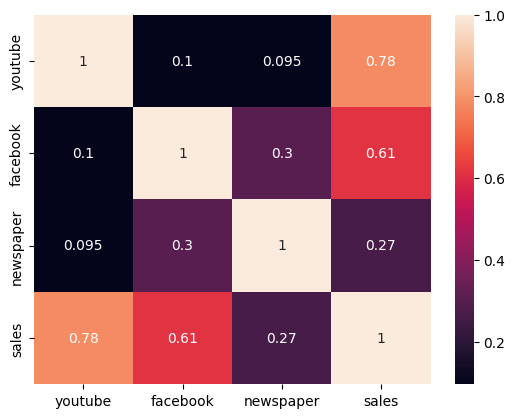

In [67]:
sns.heatmap(df.corr(),annot=True)

In [68]:
#corr value of input facebook with output sales :  0.6
#corr value of input newspaper with output sales : 0.25
#corr value of facebook and newspaper(both are input and correlated each other:0.29
#so we decided , remove newspaper because corr of facebook with sales>newspaper 
#with sales
#We have input youtube and facebook and target sales

In [69]:
#we have input tv and radio and target sales
x=df[["youtube","facebook"]] #input
y=df["sales"] #output

In [70]:
x.head()

,youtube,facebook
0,84.72,19.20
1,351.48,33.96
2,135.48,20.88
3,116.64,1.80
4,318.72,24.00


In [71]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [72]:
#create object of linear rigression class
lr=LinearRegression()

In [73]:
#train the model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
#check slope/coefficient
lr.coef_

array([0.04257659, 0.19062833])

In [75]:
#check intercepts
lr.intercept_

4.151373240514754

In [76]:
#test the model with 30% data
y_pred=lr.predict(x_test) #y_pred=m1*tv+m2*radio+m3*nwespaper+c

In [77]:
#find mean squared error
mean_squared_error(y_test,y_pred)

5.123260841325707

In [78]:
#find the r2_score
r2_score(y_test,y_pred)

0.8840928523912984

In [79]:
#work on 2nd assumption
#check inear realtion between input(youtube and facebook) and output

In [80]:
#find the residuals for each datapoint
residuals=y_test-y_pred
print(residuals)

40      1.489602
134     0.676954
4      -1.416462
151    -0.147126
118     2.694130
11      0.321302
80      0.406272
19     -1.613767
86     -0.874765
14     -1.163821
168     0.037948
107    -2.980732
97     -5.528421
124     0.815050
31      2.377702
165     0.816527
90     -0.882620
164     1.238830
109    -0.753054
138    -1.266699
60     -0.655705
158     0.279725
48      0.212564
29      2.292256
52     -2.581103
152    -1.910225
57      0.059580
5       2.038876
92     -1.675863
35      0.959807
16     -0.364530
101   -11.325796
83      0.268968
42      1.847554
127    -0.539702
108     0.213783
44      1.133437
154     2.758174
54     -1.505612
95      0.374281
39      0.108674
77      0.695035
75      0.672274
33     -1.083352
146     2.915209
55      1.144084
121    -2.352551
122     1.664973
169     2.351295
12     -0.315023
87      0.105452
Name: sales, dtype: float64


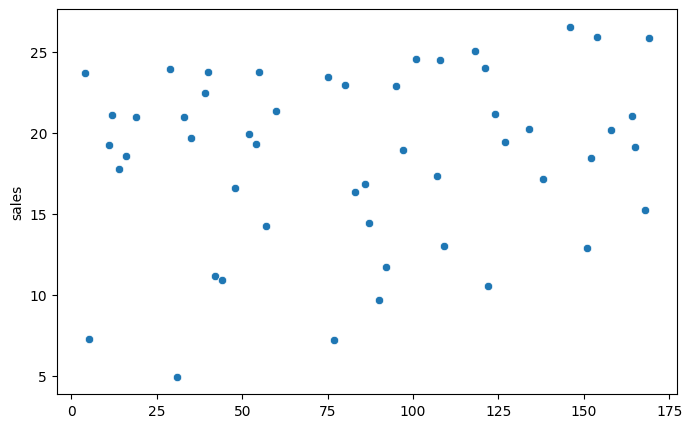

In [81]:
#visualize scatterplot between Y_pred and residuals means
#here input x=Y_pred and y=residuals because residuals depend on y_pred value
plt.figure(figsize=(8,5))
sns.scatterplot(y_pred-residuals)
plt.show()

In [82]:
#3. Assumption :  if occur linear relation then next check relation is 
#homoskedatik not a heteroskedastik

<AxesSubplot: xlabel='sales', ylabel='Count'>

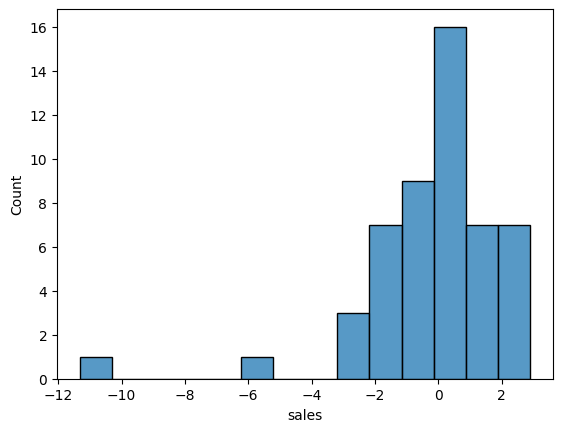

In [83]:
#work on 4th assumption
sns.histplot(residuals)

<AxesSubplot: xlabel='sales', ylabel='Density'>

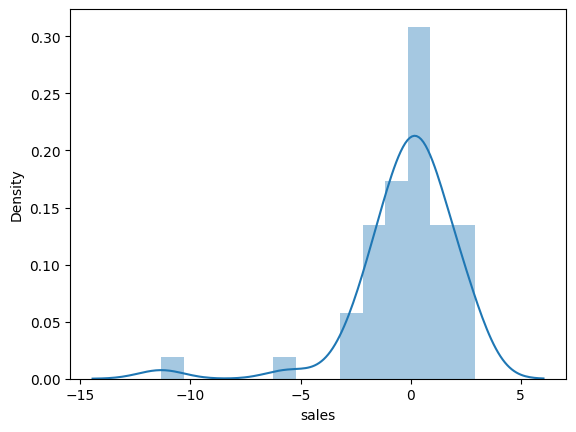

In [84]:
sns.distplot(residuals)

In [85]:
residuals.skew()

-2.547025942194227

In [86]:
#find the r2_score
r2_score(y_test,y_pred)

0.8840928523912984

In [87]:
#Model with two variable (Youtube and Facebook) have the highest score 
#here r2-score is best because nearest to +1 and MSE is very low means we
#successful model